### Exploratory Data Analysis

Importing necessary libaries for EDA

In [1]:
# Importing necessary libraries for EDA
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings(action='ignore')

d:\Python\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\Python\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\Python\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Importing the data set into pandas as a dataframe 'df'

In [2]:
# Importing the data set into pandas as a dataframe 'df'
df = pd.read_csv("D:\\Upgrad\\Multiple Linear Regression\\Assignment_bike_rental\\day.csv")

# Checking the first five rows to confirm if the data set is imported properly
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
# Checking for non null values, column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Data Cleaning and data preparation
##### Encoding and creating dummy variables


Changing 0 and 1 to year 2018 and 2019 respectively and drop the field 'yr'

In [4]:
# Changing 0 and 1 to year 2018 and 2019 respectively and drop the field 'yr'
df['year'] = df.yr.apply(lambda x: 2018 if x == 0 else 2019)
df = df.drop('yr', axis=1)


In [5]:
df.head()

instant      dteday  season  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1     1        0        6           0   
1        2  02-01-2018       1     1        0        0           0   
2        3  03-01-2018       1     1        0        1           1   
3        4  04-01-2018       1     1        0        2           1   
4        5  05-01-2018       1     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  year  
0   985  2018  
1   801  2018  
2  1349  2018  
3  1562  2018  
4  1600  2018

Extract day from the column 'dteday' and store it to another variable 'date' and drop the field 'dteday'

In [6]:
# Extract day from the column 'dteday' and store it to another variable 'date' and drop the field 'dteday'
df['date'] = pd.to_datetime(df['dteday'], dayfirst=True ).dt.day
df = df.drop('dteday', axis=1)

In [7]:
df.head()

instant  season  mnth  holiday  weekday  workingday  weathersit       temp  \
0        1       1     1        0        6           0           2  14.110847   
1        2       1     1        0        0           0           2  14.902598   
2        3       1     1        0        1           1           1   8.050924   
3        4       1     1        0        2           1           1   8.200000   
4        5       1     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  year  date  
0  18.18125  80.5833  10.749882     331         654   985  2018     1  
1  17.68695  69.6087  16.652113     131         670   801  2018     2  
2   9.47025  43.7273  16.636703     120        1229  1349  2018     3  
3  10.60610  59.0435  10.739832     108        1454  1562  2018     4  
4  11.46350  43.6957  12.522300      82        1518  1600  2018     5

Convert numbers indicated in the column seasons to string 'season' names


In [8]:
# Convert numbers indicated in the column seasons to string 'season' names
df['seasonsname'] = df.season.apply(lambda x: 'spring' if x == 1 else 'summer' if x == 2 else 'fall' if x == 3 else 'winter')

Check if the above carried out 'season name' conversion has been done correctly

In [9]:
# Check if the above carried out 'season name' conversion has been done correctly

print(all(s == 'True' for s in ["True" if (df['seasonsname'][i] == "spring") else "False" for i in np.where(df['season'] == 1)[0].tolist()]))
print(all(s == 'True' for s in ["True" if (df['seasonsname'][i] == "summer") else "False" for i in np.where(df['season'] == 2)[0].tolist()]))
print(all(s == 'True' for s in ["True" if (df['seasonsname'][i] == "fall") else "False" for i in np.where(df['season'] == 3)[0].tolist()]))
print(all(s == 'True' for s in ["True" if (df['seasonsname'][i] == "winter") else "False" for i in np.where(df['season'] == 4)[0].tolist()]))

True
True
True
True


In [10]:
df.head()

instant  season  mnth  holiday  weekday  workingday  weathersit       temp  \
0        1       1     1        0        6           0           2  14.110847   
1        2       1     1        0        0           0           2  14.902598   
2        3       1     1        0        1           1           1   8.050924   
3        4       1     1        0        2           1           1   8.200000   
4        5       1     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  year  date  \
0  18.18125  80.5833  10.749882     331         654   985  2018     1   
1  17.68695  69.6087  16.652113     131         670   801  2018     2   
2   9.47025  43.7273  16.636703     120        1229  1349  2018     3   
3  10.60610  59.0435  10.739832     108        1454  1562  2018     4   
4  11.46350  43.6957  12.522300      82        1518  1600  2018     5   

  seasonsname  
0      spring  
1      spring  
2      spring  
3      spring  
4      spring

In [11]:
df.seasonsname.value_counts()

seasonsname
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [12]:
df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

The above checks confirm that the conversion to 'season names' has been done correctly

Similarly convert numbers indicated in the column 'weathersit' to string 'weathercat' indicating weather category

In [13]:
# Convert numbers indicated in the column 'weathersit' to string 'weathercat' indicating weather category
df['weathercat'] = df.weathersit.apply(lambda x: 'mild' if x == 1 else 'medium' if x == 2 else 'strong')

In [14]:
df.head()

instant  season  mnth  holiday  weekday  workingday  weathersit       temp  \
0        1       1     1        0        6           0           2  14.110847   
1        2       1     1        0        0           0           2  14.902598   
2        3       1     1        0        1           1           1   8.050924   
3        4       1     1        0        2           1           1   8.200000   
4        5       1     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  year  date  \
0  18.18125  80.5833  10.749882     331         654   985  2018     1   
1  17.68695  69.6087  16.652113     131         670   801  2018     2   
2   9.47025  43.7273  16.636703     120        1229  1349  2018     3   
3  10.60610  59.0435  10.739832     108        1454  1562  2018     4   
4  11.46350  43.6957  12.522300      82        1518  1600  2018     5   

  seasonsname weathercat  
0      spring     medium  
1      spring     medium  
2      spring       mild  
3      spring       mild  
4      spring       mild

Check if the above conversion to 'weathercat' weather category has been done correctly or not

In [15]:
# Check if the above conversion to 'weathercat' weather category has been done correctly or not
print(all(s == 'True' for s in ["True" if (df['weathercat'][i] == "mild") else "False" for i in np.where(df['weathersit'] == 1)[0].tolist()]))
print(all(s == 'True' for s in ["True" if (df['weathercat'][i] == "medium") else "False" for i in np.where(df['weathersit'] == 2)[0].tolist()]))
print(all(s == 'True' for s in ["True" if (df['weathercat'][i] == "strong") else "False" for i in np.where(df['weathersit'] == 3)[0].tolist()]))


True
True
True


In [16]:
df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [17]:
df.weathercat.value_counts()

weathercat
mild      463
medium    246
strong     21
Name: count, dtype: int64

The above check confirms that the conversion to 'weathercat' weather categories has been done correctly

Addtion a new derived predictor variable 'weekend' since it is felt that 'weekend' can also have an influence

In [18]:
# Adding a new derived predictor variable 'weekend'
df['weekend'] = df['weekday'].apply(lambda x: 1 if (x == 0 or x == 6) else 0)

Visualizing the numerical variables for possible linear trends

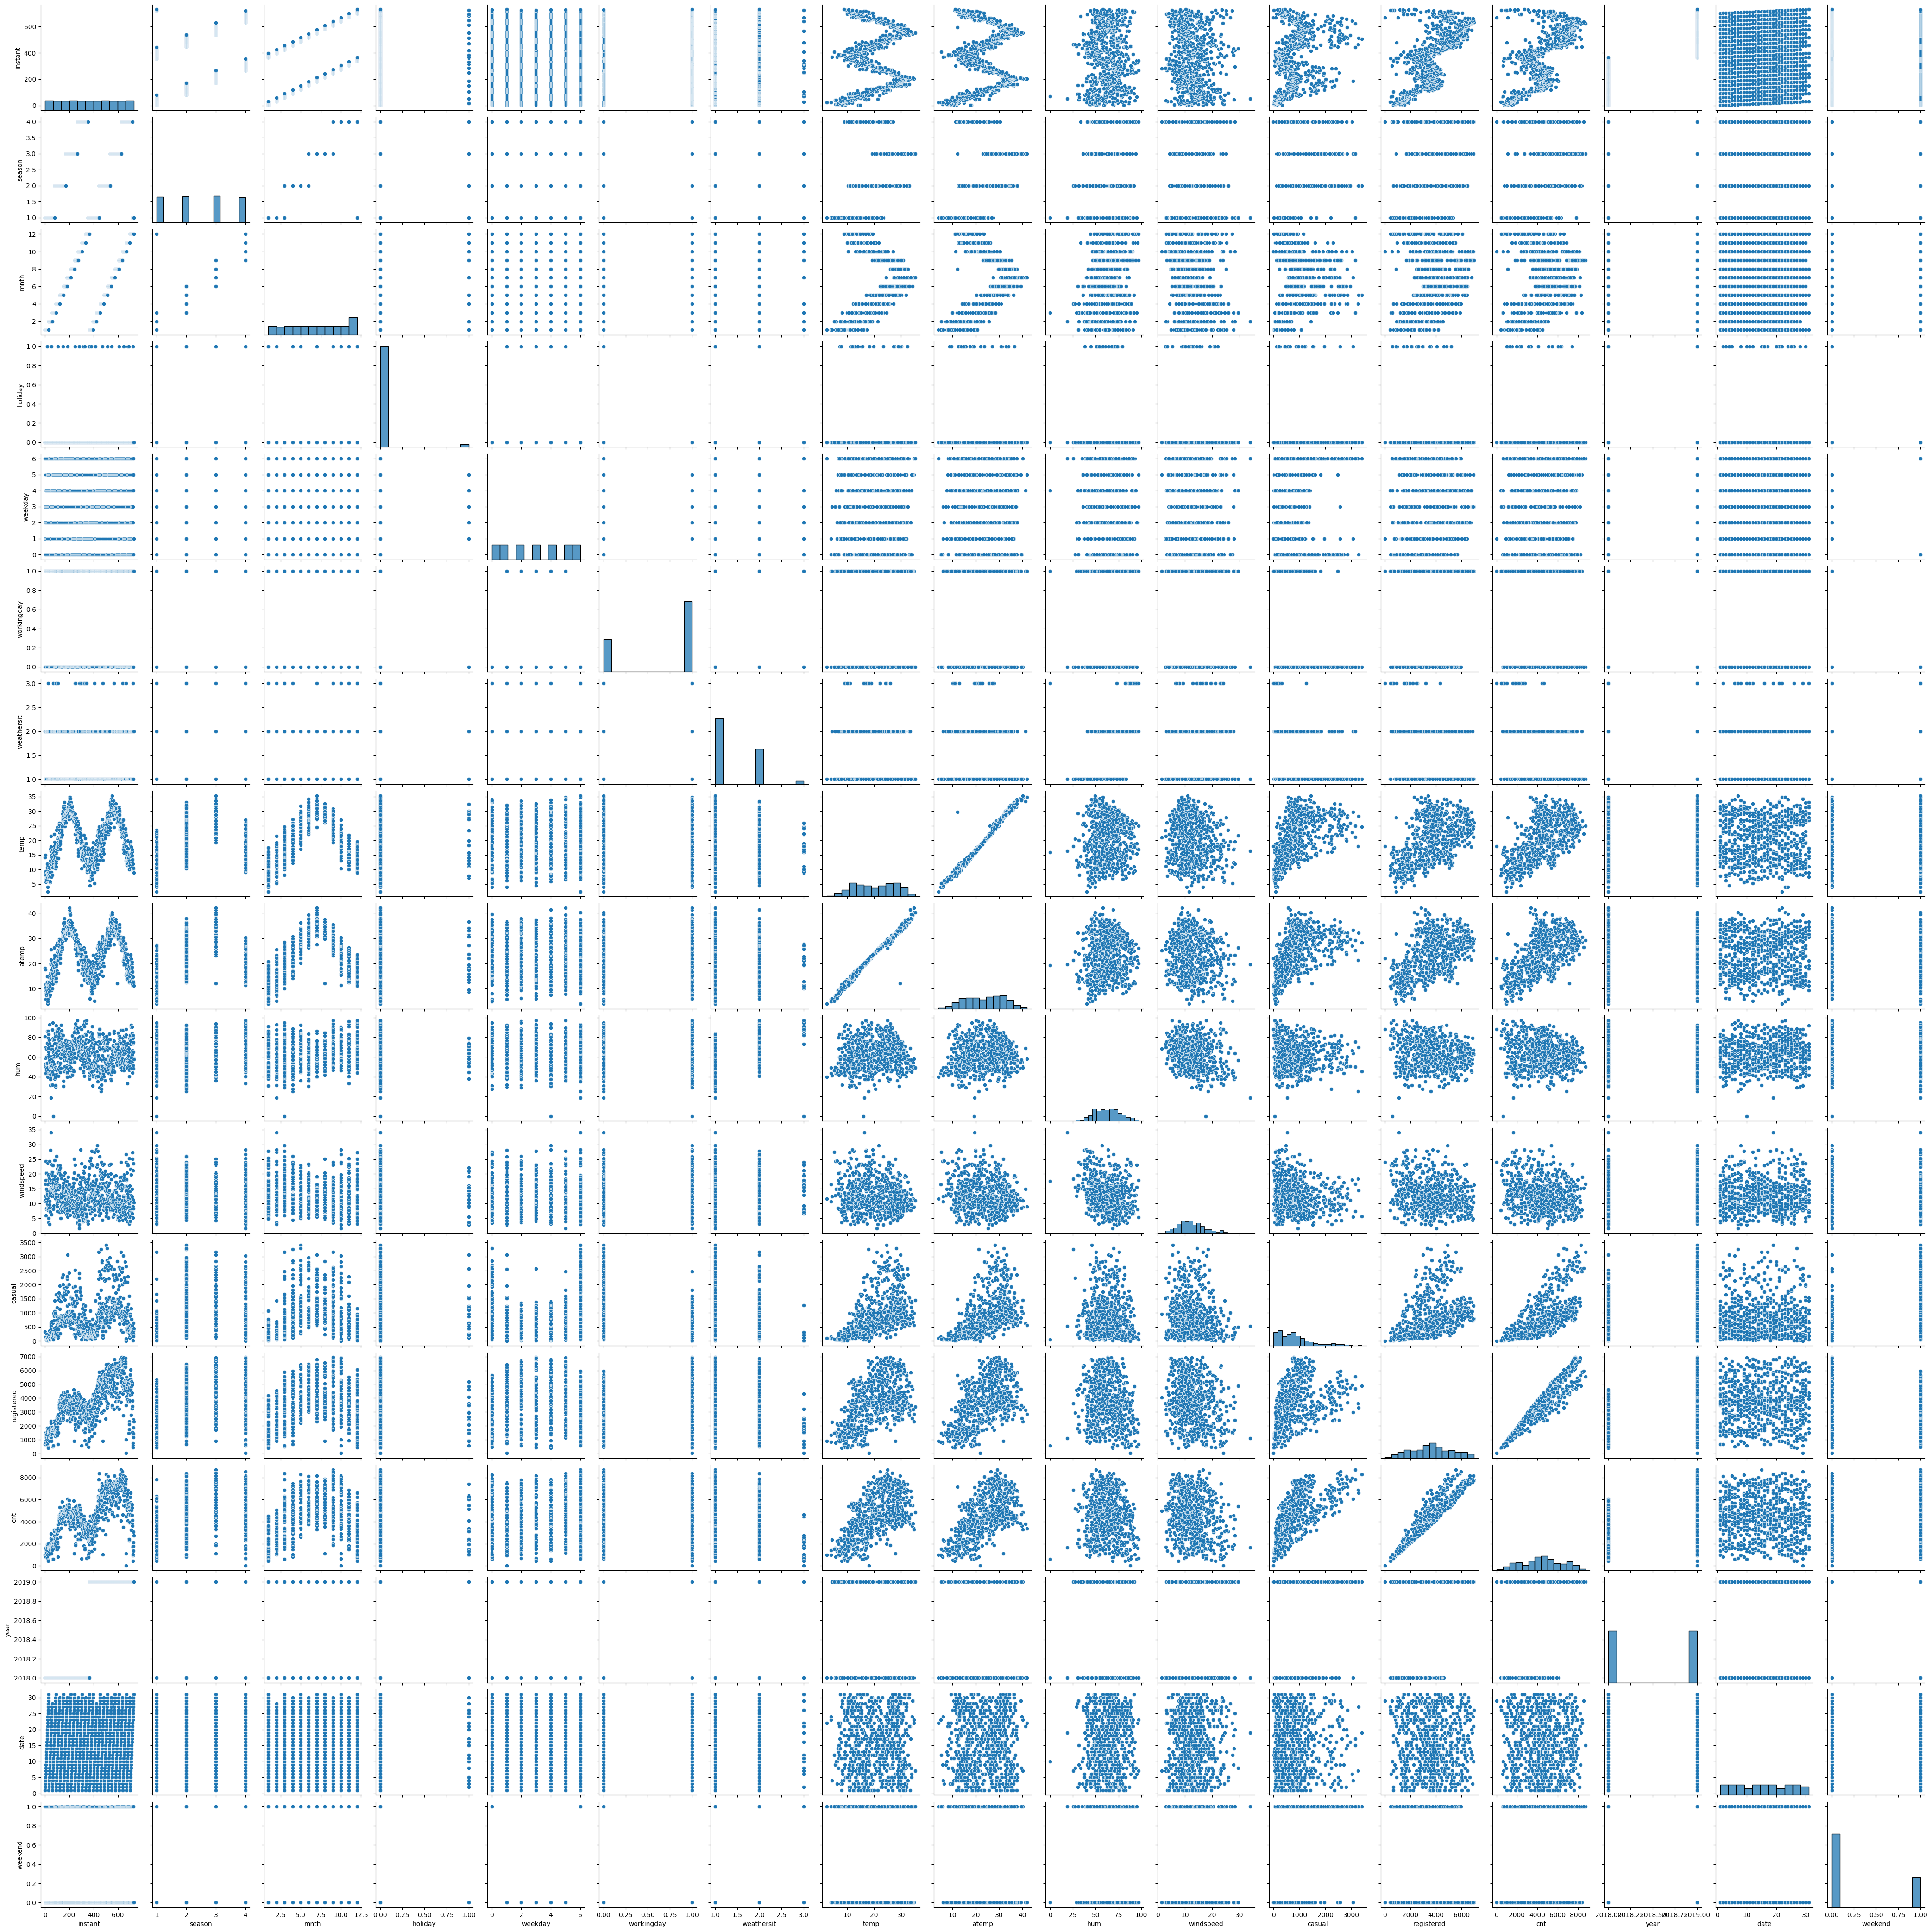

In [19]:
# Visualizing the patterns in numerical variables
sns.pairplot(df)

Visualizing the categorical variables for possible trends and patterns.

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

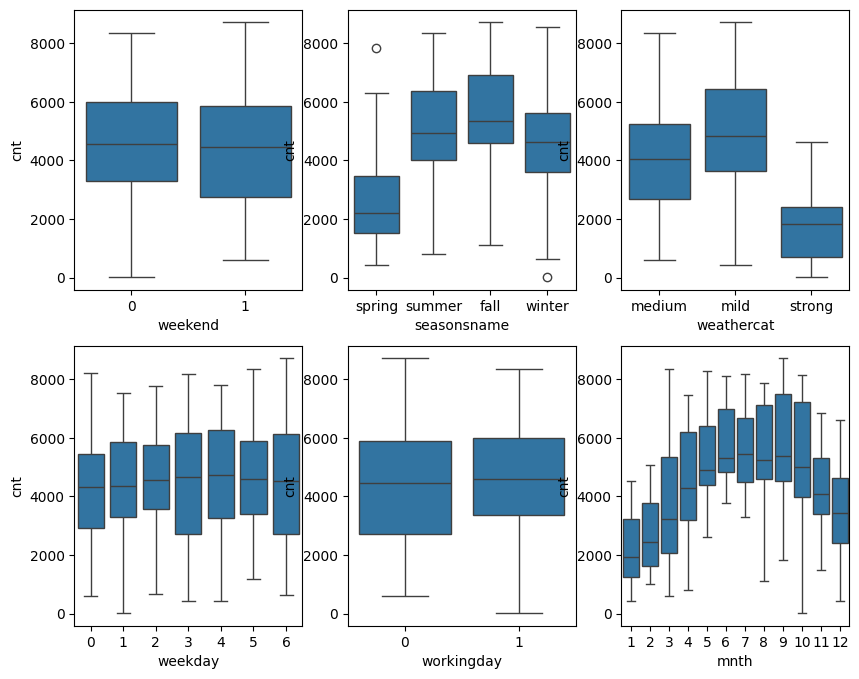

In [20]:
plt.figure(figsize=(10,8))
plt.subplot(2, 3, 1)
sns.boxplot(x='weekend',y='cnt', data=df)
plt.subplot(2, 3, 2)
sns.boxplot(x='seasonsname',y='cnt', data=df)
plt.subplot(2, 3, 3)
sns.boxplot(x='weathercat',y='cnt', data=df)
plt.subplot(2, 3, 4)
sns.boxplot(x='weekday',y='cnt', data=df)
plt.subplot(2, 3, 5)
sns.boxplot(x='workingday',y='cnt', data=df)
plt.subplot(2, 3, 6)
sns.boxplot(x='mnth',y='cnt', data=df)

In [21]:
df.describe()

instant      season        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    6.526027    0.028767    2.997260    0.683562   
std    210.877136    1.110184    3.450215    0.167266    2.006161    0.465405   
min      1.000000    1.000000    1.000000    0.000000    0.000000    0.000000   
25%    183.250000    2.000000    4.000000    0.000000    1.000000    0.000000   
50%    365.500000    3.000000    7.000000    0.000000    3.000000    1.000000   
75%    547.750000    3.000000   10.000000    0.000000    5.000000    1.000000   
max    730.000000    4.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.544807    7.506729    8.150308   14.237589    5.195841   
min      1.000000    2.424346    3.953480    0.000000    1.500244   
25%      1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000   20.465826   24.368225   62.625000   12.125325   
75%      2.000000   26.880615   30.445775   72.989575   15.625589   
max      3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt         year        date  \
count   730.000000   730.000000   730.000000   730.000000  730.000000   
mean    849.249315  3658.757534  4508.006849  2018.500000   15.720548   
std     686.479875  1559.758728  1936.011647     0.500343    8.802278   
min       2.000000    20.000000    22.000000  2018.000000    1.000000   
25%     316.250000  2502.250000  3169.750000  2018.000000    8.000000   
50%     717.000000  3664.500000  4548.500000  2018.500000   16.000000   
75%    1096.500000  4783.250000  5966.000000  2019.000000   23.000000   
max    3410.000000  6946.000000  8714.000000  2019.000000   31.000000   

          weekend  
count  730.000000  
mean     0.287671  
std      0.452987  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

Now since the variables 'season' and 'weathersit' which were numerical have been converted to categorical variables 'seasonsname' and 'weathercat' the corresponding numerical variables can be dropped from the dataset.

Similarly 'instant' can also be dropped since it has no relevance in the situation

In [22]:
# Dropping 'season' and 'weathersit' numerical variables since the corresponding categorical variables have been added

df = df.drop(['instant', 'season', 'weathersit'], axis  = 1)
df.head()

mnth  holiday  weekday  workingday       temp     atemp      hum  \
0     1        0        6           0  14.110847  18.18125  80.5833   
1     1        0        0           0  14.902598  17.68695  69.6087   
2     1        0        1           1   8.050924   9.47025  43.7273   
3     1        0        2           1   8.200000  10.60610  59.0435   
4     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed  casual  registered   cnt  year  date seasonsname weathercat  \
0  10.749882     331         654   985  2018     1      spring     medium   
1  16.652113     131         670   801  2018     2      spring     medium   
2  16.636703     120        1229  1349  2018     3      spring       mild   
3  10.739832     108        1454  1562  2018     4      spring       mild   
4  12.522300      82        1518  1600  2018     5      spring       mild   

   weekend  
0        1  
1        1  
2        0  
3        0  
4        0

From the above we can see scope for application of linear regression since numerical variables are showing trends and categorical variables are showing patters

### Dummy Variables

Convert the 'weathercat' categorical variable into dummy variables

0 0 --> 'medium'

1 0 --> 'mild'

0 1 --> 'strong'

In [23]:
# Convert the 'weathercat' categorical variable into dummy variables
# 0 0 --> 'medium'
# 1 0 --> 'mild'
# 0 1 --> 'strong'
weath_status = pd.get_dummies(df['weathercat'], dtype=int, drop_first=True)
weath_status


mild  strong
0       0       0
1       0       0
2       1       0
3       1       0
4       1       0
..    ...     ...
725     0       0
726     0       0
727     0       0
728     1       0
729     0       0

[730 rows x 2 columns]

In [24]:
# Convert the 'weathercat' categorical variable into dummy variables
#1 0 0 --> 1--> spring
#0 1 0 --> 2--> summer
#0 0 0 --> 3--> fall
#0 0 1 --> 4--> winter
seas_name = pd.get_dummies(df['seasonsname'], dtype=int, drop_first=True)
seas_name

spring  summer  winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0       0

[730 rows x 3 columns]

Checking the indices and values for seasons_name categorical variable with the original csv file dataset

In [25]:
# Checking the indices and values for seasons_name categorical variable with the original csv file dataset
[print(seas_name[seas_name.columns[i]].iloc[1]) for i in range(len(seas_name.columns.tolist()))]
print("\n")
[print(seas_name[seas_name.columns[i]].iloc[159]) for i in range(len(seas_name.columns.tolist()))]
print("\n")
[print(seas_name[seas_name.columns[i]].iloc[230]) for i in range(len(seas_name.columns.tolist()))]
print("\n")
[print(seas_name[seas_name.columns[i]].iloc[320]) for i in range(len(seas_name.columns.tolist()))]
print("\n")

1
0
0


0
1
0


0
0
0


0
0
1




Concatenating 'seas_name' and 'weath_status' dummy variables with the original dataset df

In [26]:
df = pd.concat([df, seas_name, weath_status], axis = 1)
df.head()

mnth  holiday  weekday  workingday       temp     atemp      hum  \
0     1        0        6           0  14.110847  18.18125  80.5833   
1     1        0        0           0  14.902598  17.68695  69.6087   
2     1        0        1           1   8.050924   9.47025  43.7273   
3     1        0        2           1   8.200000  10.60610  59.0435   
4     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed  casual  registered  ...  year  date  seasonsname weathercat  \
0  10.749882     331         654  ...  2018     1       spring     medium   
1  16.652113     131         670  ...  2018     2       spring     medium   
2  16.636703     120        1229  ...  2018     3       spring       mild   
3  10.739832     108        1454  ...  2018     4       spring       mild   
4  12.522300      82        1518  ...  2018     5       spring       mild   

  weekend  spring  summer  winter  mild  strong  
0       1       1       0       0     0       0  
1       1       1       0       0     0       0  
2       0       1       0       0     1       0  
3       0       1       0       0     1       0  
4       0       1       0       0     1       0  

[5 rows x 21 columns]

Since the categorical vairables 'season', 'seasonname' and 'weathersit', 'weathercat' have been converted to dummy variables, we can drop those two categorical variables

In [27]:
# Since the categorical vairables 'seasonname' and 'weathercat' have been converted to dummy variables, we can drop those two categorical variables

df = df.drop(['seasonsname', 'weathercat'], axis = 1)
df.head()

mnth  holiday  weekday  workingday       temp     atemp      hum  \
0     1        0        6           0  14.110847  18.18125  80.5833   
1     1        0        0           0  14.902598  17.68695  69.6087   
2     1        0        1           1   8.050924   9.47025  43.7273   
3     1        0        2           1   8.200000  10.60610  59.0435   
4     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed  casual  registered   cnt  year  date  weekend  spring  summer  \
0  10.749882     331         654   985  2018     1        1       1       0   
1  16.652113     131         670   801  2018     2        1       1       0   
2  16.636703     120        1229  1349  2018     3        0       1       0   
3  10.739832     108        1454  1562  2018     4        0       1       0   
4  12.522300      82        1518  1600  2018     5        0       1       0   

   winter  mild  strong  
0       0     0       0  
1       0     0       0  
2       0     1       0  
3       0     1       0  
4       0     1       0

In addition it is mentioned that the target variable is 'cnt', while 'cnt' is the sum of 'casual' and 'registered'. Therefore the variables 'casual' and 'registered' can also be dropped.

In [28]:
df = df.drop(['registered', 'casual'], axis = 1)
df.head()

mnth  holiday  weekday  workingday       temp     atemp      hum  \
0     1        0        6           0  14.110847  18.18125  80.5833   
1     1        0        0           0  14.902598  17.68695  69.6087   
2     1        0        1           1   8.050924   9.47025  43.7273   
3     1        0        2           1   8.200000  10.60610  59.0435   
4     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed   cnt  year  date  weekend  spring  summer  winter  mild  strong  
0  10.749882   985  2018     1        1       1       0       0     0       0  
1  16.652113   801  2018     2        1       1       0       0     0       0  
2  16.636703  1349  2018     3        0       1       0       0     1       0  
3  10.739832  1562  2018     4        0       1       0       0     1       0  
4  12.522300  1600  2018     5        0       1       0       0     1       0

##### With the above step, encoding and creating dummy variables in the dataset is over.

#### Now scaling and test-train split
It is felt that scaling is not required since not much high range of variations are found in the predictor variables.

test-train split

In [29]:
# importing libraries for test-train split

import sklearn
from sklearn.model_selection import train_test_split

In [30]:
# Splitting as test-train data in the ratio 70, 30, since we have around 700+ of data points. The shape of the test-train data is also checked
df_train, df_test = train_test_split(df, train_size=0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 17)
(220, 17)


In [31]:
## Scaling numerical variables in training set
from sklearn.preprocessing import MinMaxScaler
vars = ['mnth','atemp','hum','windspeed','year','date','weekday','cnt']
scaler = MinMaxScaler()
df_train[vars] = scaler.fit_transform(df_train[vars])

df_train.head()

mnth  holiday   weekday  workingday       temp     atemp       hum  \
576  0.545455        0  0.333333           1  29.246653  0.766351  0.725633   
426  0.181818        0  1.000000           0  16.980847  0.438975  0.640189   
728  1.000000        0  0.000000           0  10.489153  0.200348  0.498067   
482  0.272727        0  1.000000           0  15.443347  0.391735  0.504508   
111  0.272727        0  0.833333           1  13.803347  0.318819  0.751824   

     windspeed       cnt  year      date  weekend  spring  summer  winter  \
576   0.264686  0.827658   1.0  1.000000        0       0       0       0   
426   0.255342  0.465255   1.0  0.066667        1       1       0       0   
728   0.663106  0.204096   1.0  0.966667        1       1       0       0   
482   0.188475  0.482973   1.0  0.900000        1       0       1       0   
111   0.380981  0.191095   0.0  0.700000        0       0       1       0   

     mild  strong  
576     1       0  
426     0       0  
728     1       0  
482     0       0  
111     0       0

In [32]:
df_train[vars].describe()

mnth       atemp         hum   windspeed        year        date  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.503743    0.513156    0.650480    0.320883    0.507843    0.486405   
std      0.315038    0.212410    0.145846    0.169803    0.500429    0.297061   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.181818    0.332086    0.538643    0.199179    0.000000    0.233333   
50%      0.545455    0.529718    0.653714    0.296763    1.000000    0.500000   
75%      0.818182    0.688457    0.754830    0.414447    1.000000    0.733333   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          weekday         cnt  
count  510.000000  510.000000  
mean     0.498366    0.513499  
std      0.336182    0.224421  
min      0.000000    0.000000  
25%      0.166667    0.356420  
50%      0.500000    0.518638  
75%      0.833333    0.684710  
max      1.000000    1.000000

from the above it can be seen that max value is 1 and min value is 0 after the scaling process

### Train the model
#### Start from the most influential variable and keep on adding variables one by one. 

For that heatmap of correlations are to be plotted

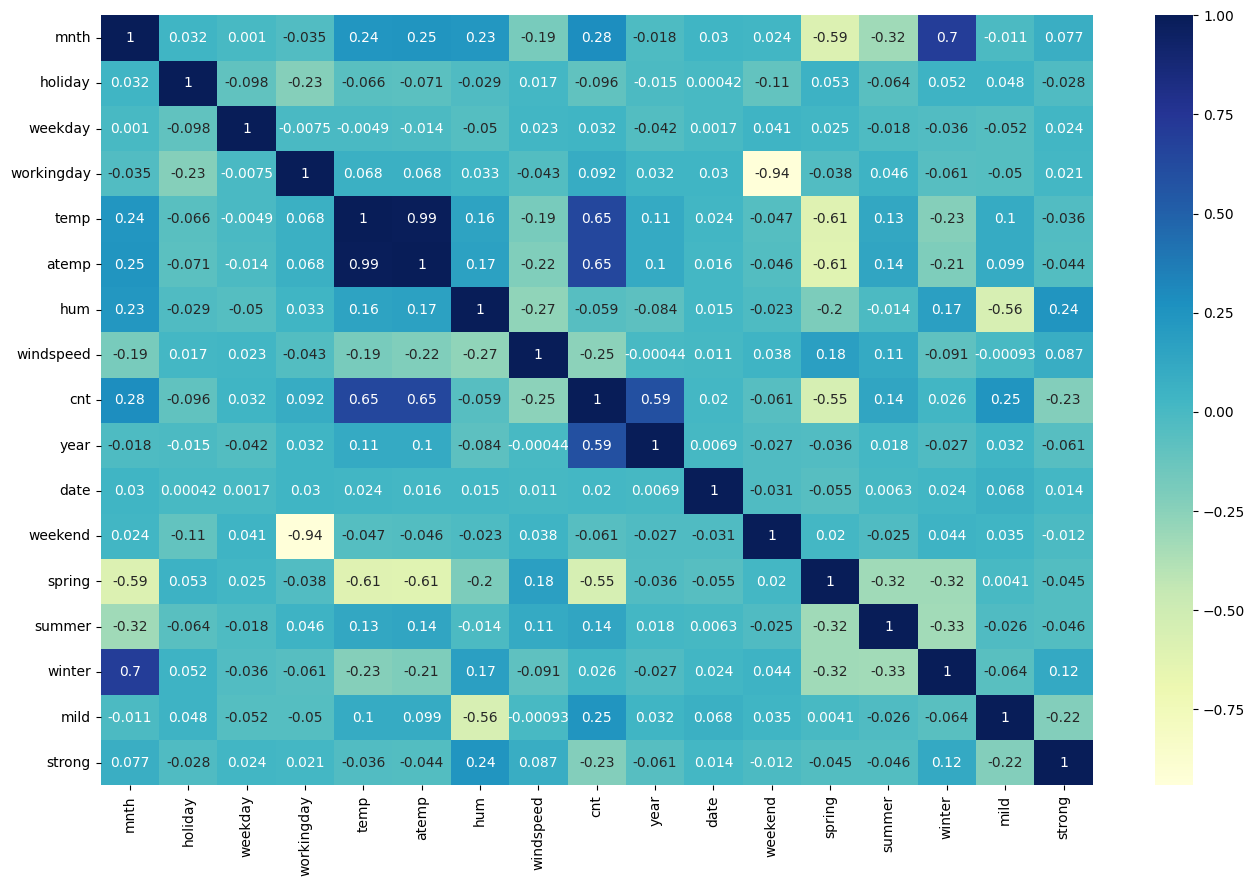

In [33]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above, it can be seen that temp and atemp have significant multicollinearity and therefore one these are to be dropped. It is felt that 'temp' can be dropped since what factors is how the users feel the heat which is given by 'atemp'

In [34]:
df_train = df_train.drop('temp', axis = 1)
df_train.head()

mnth  holiday   weekday  workingday     atemp       hum  windspeed  \
576  0.545455        0  0.333333           1  0.766351  0.725633   0.264686   
426  0.181818        0  1.000000           0  0.438975  0.640189   0.255342   
728  1.000000        0  0.000000           0  0.200348  0.498067   0.663106   
482  0.272727        0  1.000000           0  0.391735  0.504508   0.188475   
111  0.272727        0  0.833333           1  0.318819  0.751824   0.380981   

          cnt  year      date  weekend  spring  summer  winter  mild  strong  
576  0.827658   1.0  1.000000        0       0       0       0     1       0  
426  0.465255   1.0  0.066667        1       1       0       0     0       0  
728  0.204096   1.0  0.966667        1       1       0       0     1       0  
482  0.482973   1.0  0.900000        1       0       1       0     0       0  
111  0.191095   0.0  0.700000        0       0       1       0     0       0

Checking correlation again

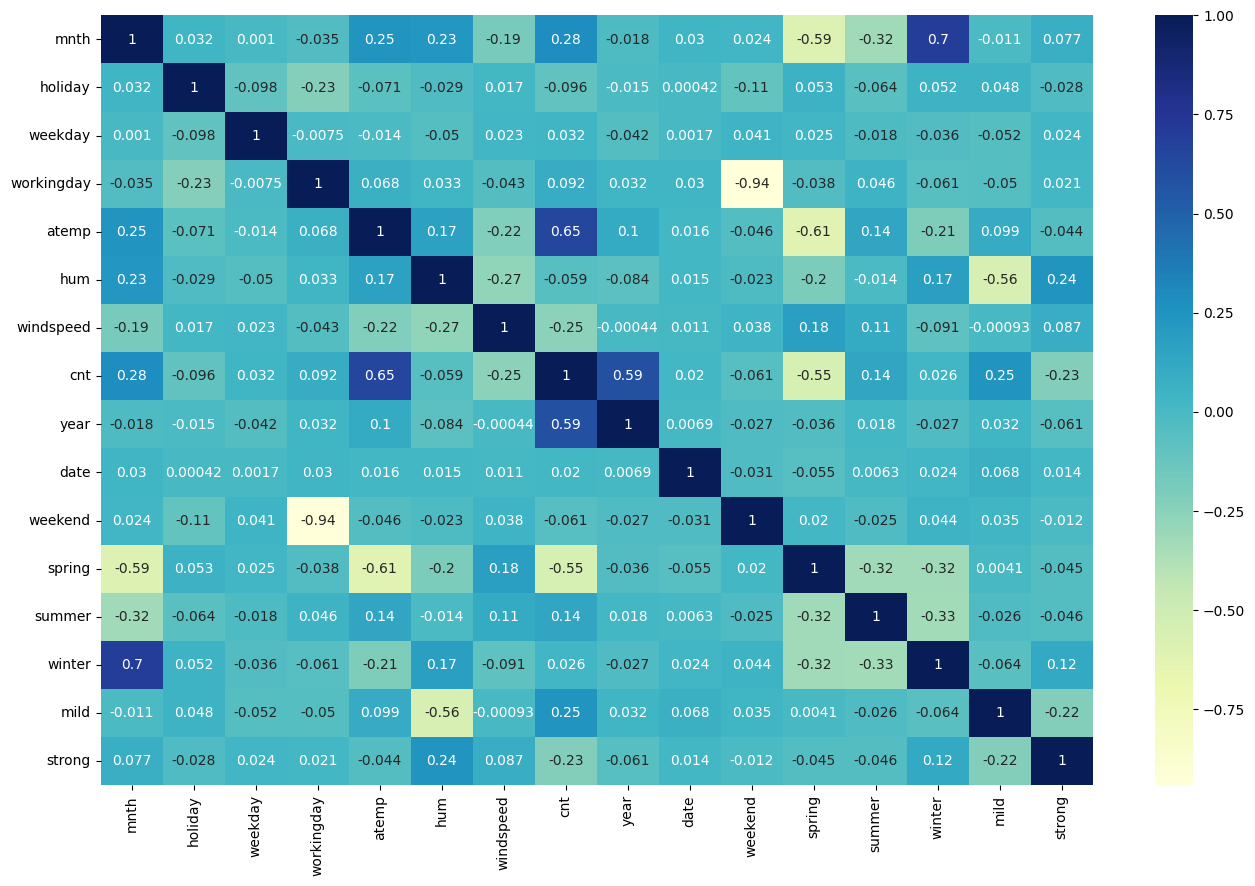

In [35]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Using RFE to train the model.
choose the variables atemp, hum, windspeed, weekend, holiday, spring, summer, winter, mild, strong, workingday ie 11 variables to start off with

defining predictor and target variables in training data

In [36]:
#defining predictor and target variables in training data
y_train = df_train.pop('cnt') # prediction requried
X_train = df_train # predictor variables

In [37]:
# importing libraries for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# making a linear model with the available varaibles
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [39]:
# Passing the linear model to RFE
rfe = RFE(estimator = lm, n_features_to_select = 11)
rfe = rfe.fit(X_train, y_train)

Checking the variables RFE has chosen

In [40]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('mnth', False, 3),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('year', True, 1),
 ('date', False, 5),
 ('weekend', False, 4),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mild', True, 1),
 ('strong', True, 1)]

In [41]:
# Variables RFE has dropped
X_train.columns[~rfe.support_]

Index(['mnth', 'workingday', 'date', 'weekend'], dtype='object')

In [42]:
# Variables RFE has considered
var_rfe = X_train.columns[rfe.support_]
var_rfe

Index(['holiday', 'weekday', 'atemp', 'hum', 'windspeed', 'year', 'spring',
       'summer', 'winter', 'mild', 'strong'],
      dtype='object')

Building model using statsmodel

In [43]:
X_train_rfe = X_train[var_rfe]

In [44]:
X_train_rfe.shape

(510, 11)

Importing statsmodel library

In [45]:
# import statsmodel library
import statsmodels.api as sm


In [46]:
# Adding constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
# New model using OLS
lrm = sm.OLS(y_train, X_train_rfe).fit()

In [48]:
# Checking the statistics
lrm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.7
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.16e-182
Time:                        21:15:17   Log-Likelihood:                 488.48
No. Observations:                 510   AIC:                            -953.0
Df Residuals:                     498   BIC:                            -902.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2214      0.040      5.542      0.000       0.143       0.300
holiday       -0.0727      0.027     -2.722      0.007      -0.125      -0.020
weekday        0.0499      0.013      3.976      0.000       0.025       0.075
atemp          0.4935      0.035     13.993      0.000       0.424       0.563
hum           -0.1250      0.039     -3.187      0.002      -0.202      -0.048
windspeed     -0.1640      0.027     -6.118      0.000      -0.217      -0.111
year           0.2338      0.008     27.636      0.000       0.217       0.250
spring        -0.0958      0.020     -4.841      0.000      -0.135      -0.057
summer         0.0300      0.013      2.232      0.026       0.004       0.056
winter         0.0679      0.016      4.201      0.000       0.036       0.100
mild           0.0569      0.011      5.191      0.000       0.035       0.078
strong        -0.1855      0.026     -7.124      0.000      -0.237      -0.134
==============================================================================
Omnibus:                       79.894   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.977
Skew:                          -0.793   Prob(JB):                     1.38e-44
Kurtosis:                       5.643   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# import libraries for checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# Check VIF after dropping constant
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.drop('const', axis = 1).columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.drop('const', axis = 1).values, i) for i in range(X_train_rfe.drop('const', axis = 1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
3         hum  21.55
2       atemp  17.48
4   windspeed   4.57
6      spring   4.09
9        mild   3.36
8      winter   3.14
1     weekday   3.09
7      summer   2.27
5        year   2.06
10     strong   1.15
0     holiday   1.05

From the above statistics it can be seen that humidity is having a high VIF value and needs to be dropped.

In [51]:
# dropping 'hum' from the training data since it has the highest p value
X_train_rfe1 = X_train_rfe.drop(['hum'], axis = 1)

In [52]:
# adding constant to new X_train
X_train_rfe1 = sm.add_constant(X_train_rfe1)

In [53]:
#  rebuild the new model without 'hum' 
lrm1 = sm.OLS(y_train, X_train_rfe1).fit()

In [54]:
# Checking summary statistics
lrm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     235.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.10e-181
Time:                        21:15:18   Log-Likelihood:                 483.33
No. Observations:                 510   AIC:                            -944.7
Df Residuals:                     499   BIC:                            -898.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1356      0.030      4.553      0.000       0.077       0.194
holiday       -0.0732      0.027     -2.716      0.007      -0.126      -0.020
weekday        0.0536      0.013      4.251      0.000       0.029       0.078
atemp          0.4663      0.035     13.504      0.000       0.398       0.534
windspeed     -0.1400      0.026     -5.393      0.000      -0.191      -0.089
year           0.2368      0.008     27.927      0.000       0.220       0.253
spring        -0.1020      0.020     -5.132      0.000      -0.141      -0.063
summer         0.0264      0.014      1.950      0.052      -0.000       0.053
winter         0.0577      0.016      3.610      0.000       0.026       0.089
mild           0.0773      0.009      8.597      0.000       0.060       0.095
strong        -0.2001      0.026     -7.738      0.000      -0.251      -0.149
==============================================================================
Omnibus:                       78.168   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.038
Skew:                          -0.792   Prob(JB):                     8.93e-42
Kurtosis:                       5.527   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above statistics it can be seen that r2 values are not much different from the first model, though 'hum' has been dropped. All the p values are acceptable except 'summer'

Checking VIF values for multicollinearity in the model new model lrm1

In [55]:
# Check VIF after dropping constant
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.drop('const', axis = 1).columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.drop('const', axis = 1).values, i) for i in range(X_train_rfe1.drop('const', axis = 1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
2      atemp  5.10
3  windspeed  4.57
1    weekday  3.05
8       mild  2.81
5     spring  2.14
4       year  2.06
6     summer  1.79
7     winter  1.65
9     strong  1.11
0    holiday  1.05

From the above, it can be seen that all varaibles are having VIF values less than 5 or almost 5 and therefore acceptable. 

Also, the P values and all very small indicating significance except for 'summer'

We can try dropping 'summer'

In [56]:
# dropping 'summer'
X_train_rfe2 = X_train_rfe1.drop(['summer'], axis = 1)

In [57]:
# adding constant to new X_train
X_train_rfe2 = sm.add_constant(X_train_rfe2)

In [58]:
#  rebuild the new model without 'holiday' 
lrm2 = sm.OLS(y_train, X_train_rfe2).fit()

In [59]:
# Checking the new statistics
lrm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.5
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          4.38e-182
Time:                        21:15:18   Log-Likelihood:                 481.40
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     500   BIC:                            -900.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1674      0.025      6.700      0.000       0.118       0.216
holiday       -0.0747      0.027     -2.766      0.006      -0.128      -0.022
weekday        0.0525      0.013      4.158      0.000       0.028       0.077
atemp          0.4356      0.031     14.129      0.000       0.375       0.496
windspeed     -0.1338      0.026     -5.178      0.000      -0.185      -0.083
year           0.2373      0.008     27.918      0.000       0.221       0.254
spring        -0.1267      0.015     -8.232      0.000      -0.157      -0.096
winter         0.0382      0.013      3.054      0.002       0.014       0.063
mild           0.0768      0.009      8.517      0.000       0.059       0.094
strong        -0.2028      0.026     -7.829      0.000      -0.254      -0.152
==============================================================================
Omnibus:                       79.386   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.948
Skew:                          -0.807   Prob(JB):                     5.67e-42
Kurtosis:                       5.516   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that there is not much difference in R2 value after dropping 'summer'. All p values are acceptable too. We can try checking the VIF value again

In [60]:
# Check VIF after dropping constant
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.drop('const', axis = 1).columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.drop('const', axis = 1).values, i) for i in range(X_train_rfe2.drop('const', axis = 1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
2      atemp  5.09
3  windspeed  3.96
1    weekday  3.01
7       mild  2.80
4       year  2.05
5     spring  1.80
6     winter  1.40
8     strong  1.11
0    holiday  1.05

atemp is having a marginally high VIF value. We can try dropping 'atemp'

In [61]:
# next, dropping 'atemp' from the training data
X_train_rfe3 = X_train_rfe2.drop(['atemp'], axis = 1)

In [62]:
# adding constant to new X_train
X_train_rfe3 = sm.add_constant(X_train_rfe3)

In [63]:
#  rebuild the new model without 'atemp' 
lrm3 = sm.OLS(y_train, X_train_rfe3).fit()

In [64]:
# Checking the statistics
lrm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     191.2
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          6.69e-147
Time:                        21:15:18   Log-Likelihood:                 395.73
No. Observations:                 510   AIC:                            -773.5
Df Residuals:                     501   BIC:                            -735.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4611      0.016     28.148      0.000       0.429       0.493
holiday       -0.0798      0.032     -2.500      0.013      -0.142      -0.017
weekday        0.0516      0.015      3.454      0.001       0.022       0.081
windspeed     -0.2016      0.030     -6.717      0.000      -0.261      -0.143
year           0.2491      0.010     24.917      0.000       0.229       0.269
spring        -0.2848      0.012    -22.821      0.000      -0.309      -0.260
winter        -0.0594      0.012     -4.810      0.000      -0.084      -0.035
mild           0.0906      0.011      8.557      0.000       0.070       0.111
strong        -0.1993      0.031     -6.512      0.000      -0.259      -0.139
==============================================================================
Omnibus:                       33.517   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.521
Skew:                          -0.452   Prob(JB):                     5.33e-13
Kurtosis:                       4.358   Cond. No.                         9.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above, we can see that  r2 values after dropping 'atemp' has reduced drastically. We can check for VIF again.

In [65]:
# Check VIF after dropping constant
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.drop('const', axis = 1).columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.drop('const', axis = 1).values, i) for i in range(X_train_rfe3.drop('const', axis = 1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
2  windspeed  3.39
1    weekday  2.50
6       mild  2.30
3       year  1.82
4     spring  1.49
5     winter  1.38
7     strong  1.11
0    holiday  1.05

Though VIF values are within 5 after dropping the variaable 'atemp', it is logically not correct to drop 'atemp' for the following reasons.<br>1. The r2 value drastically reduced. <br>2. It is felt that the real feel temperature will have an influence on the bike sharing service since users might be influenced with the real feel temperature to take a decision.<br>3. atemp has the highest coefficient in the LR model.<br>4. atemp had the highest correlation coefficient when checked with the heat map of correlation coeffs of all variables.<br><br>Therefore resort back tot he model 'lrm2' with 'atemp' included.

Since there are now 9 variables in lrm2 model, we can try dropping variables to make the model more simple. We can try dropping  'weekday' since it has a coefficient closest to zero when comparing with other variables' coefficients.

In [66]:
# next, dropping 'weekday' from the training data
X_train_rfe4 = X_train_rfe2.drop(['weekday'], axis = 1)

In [67]:
# adding constant to new X_train
X_train_rfe4 = sm.add_constant(X_train_rfe4)

In [68]:
#  rebuild the new model without 'weekday' 
lrm4 = sm.OLS(y_train, X_train_rfe4).fit()

In [69]:
# Checking the statistics
lrm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     280.6
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.21e-179
Time:                        21:15:18   Log-Likelihood:                 472.73
No. Observations:                 510   AIC:                            -927.5
Df Residuals:                     501   BIC:                            -889.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1956      0.024      8.003      0.000       0.148       0.244
holiday       -0.0854      0.027     -3.128      0.002      -0.139      -0.032
atemp          0.4349      0.031     13.883      0.000       0.373       0.496
windspeed     -0.1320      0.026     -5.028      0.000      -0.184      -0.080
year           0.2359      0.009     27.331      0.000       0.219       0.253
spring        -0.1262      0.016     -8.073      0.000      -0.157      -0.095
winter         0.0369      0.013      2.902      0.004       0.012       0.062
mild           0.0751      0.009      8.211      0.000       0.057       0.093
strong        -0.2016      0.026     -7.661      0.000      -0.253      -0.150
==============================================================================
Omnibus:                       65.527   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.914
Skew:                          -0.657   Prob(JB):                     1.55e-36
Kurtosis:                       5.456   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above statistic it can be seen that even after dropping the variable 'weekday' there is not much drop in r2 value. prob(F-Statistic) is very low indicating a good model. P values are also very low


We can consider this model(lrm4) as the one chosen one to check for residual errors

Check VIF values once again to re-confirm

In [70]:
# Checking VIF values once again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.drop('const', axis = 1).columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.drop('const', axis = 1).values, i) for i in range(X_train_rfe4.drop('const', axis = 1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
1      atemp  4.22
2  windspeed  3.86
6       mild  2.80
3       year  2.05
4     spring  1.67
5     winter  1.36
7     strong  1.11
0    holiday  1.04

Here we can see that VIF values are all less than 5 therefore acceptable

Still there are 8 variables, we can try dropping the variable 'winter' since it has the next closest cofficient to zero

In [71]:
# next, dropping 'winter' from the training data
X_train_rfe5 = X_train_rfe4.drop(['winter'], axis = 1)

In [72]:
# adding constant to new X_train
X_train_rfe5 = sm.add_constant(X_train_rfe5)

In [73]:
#  rebuild the new model without 'winter' 
lrm5 = sm.OLS(y_train, X_train_rfe5).fit()

In [74]:
# Checking the statistics
lrm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     314.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          4.24e-179
Time:                        21:15:18   Log-Likelihood:                 468.48
No. Observations:                 510   AIC:                            -921.0
Df Residuals:                     502   BIC:                            -887.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.019     12.330      0.000       0.201       0.277
holiday       -0.0808      0.027     -2.942      0.003      -0.135      -0.027
atemp          0.3848      0.026     14.618      0.000       0.333       0.436
windspeed     -0.1426      0.026     -5.446      0.000      -0.194      -0.091
year           0.2366      0.009     27.220      0.000       0.219       0.254
spring        -0.1526      0.013    -11.916      0.000      -0.178      -0.127
mild           0.0757      0.009      8.217      0.000       0.058       0.094
strong        -0.1950      0.026     -7.382      0.000      -0.247      -0.143
==============================================================================
Omnibus:                       56.085   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.340
Skew:                          -0.590   Prob(JB):                     4.98e-29
Kurtosis:                       5.178   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

it can be seen that there is not much reduction in the r2 value after dropping  'winter', p values are very low and prob(f-statistic) is also very low. Seems to be a good model. can check VIF now

In [75]:
# Checking VIF values once again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.drop('const', axis = 1).columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.drop('const', axis = 1).values, i) for i in range(X_train_rfe5.drop('const', axis = 1).shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
1      atemp  4.21
2  windspeed  3.68
5       mild  2.75
3       year  2.02
4     spring  1.55
6     strong  1.09
0    holiday  1.03

from the above, it can be seen that VIF values are less than 5 and therefore no multicollinearity is observed.<br> Tried dropping the varaible 'year' since it is assumed year wont be having an influence. But the r2 dropped to 53%, see below. Therefore it is found that 'year' is having a significant influence.

Therefore model lrm5 with the variable 'year' shall be considered for further steps

In [76]:
# next, try dropping the variable 'year' 
X_train_rfe6 = X_train_rfe5.drop(['year'], axis = 1)
# adding constant to new X_train
X_train_rfe6 = sm.add_constant(X_train_rfe6)
#  rebuild the new model without 'year' 
lrm6 = sm.OLS(y_train, X_train_rfe6).fit()
# Checking the statistics
lrm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     98.68
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           9.98e-82
Time:                        21:15:18   Log-Likelihood:                 237.28
No. Observations:                 510   AIC:                            -460.6
Df Residuals:                     503   BIC:                            -430.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3147      0.030     10.424      0.000       0.255       0.374
holiday       -0.0884      0.043     -2.048      0.041      -0.173      -0.004
atemp          0.4563      0.041     11.083      0.000       0.375       0.537
windspeed     -0.1247      0.041     -3.031      0.003      -0.206      -0.044
spring        -0.1428      0.020     -7.096      0.000      -0.182      -0.103
mild           0.0776      0.014      5.360      0.000       0.049       0.106
strong        -0.2329      0.041     -5.618      0.000      -0.314      -0.151
==============================================================================
Omnibus:                       12.437   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.050
Skew:                           0.160   Prob(JB):                       0.0179
Kurtosis:                       2.475   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual Analysis
residual = y train - y predicted
and plot the value

<AxesSubplot:ylabel='Density'>

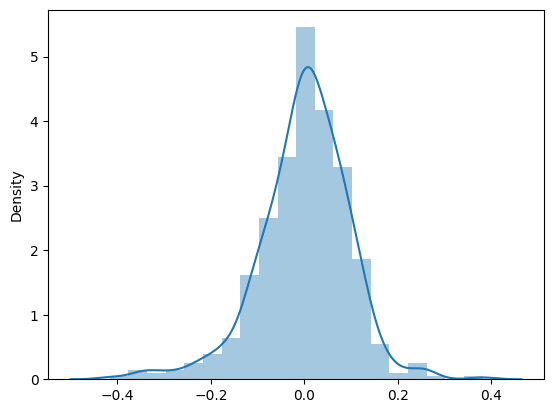

In [77]:
y_train_cnt = lrm5.predict(X_train_rfe5)
res = y_train - y_train_cnt
sns.distplot(res, bins = 20)


The residual error is following a normal distribution, with mean around zero. <br>Therefore found to be satisfactory. the model lrm5 is considered for further steps

Checking for residuals pattern in scatter plot to evaluate the model. It is found that the variance is almost constant with very little deviatin towards the right end. still the model is acceptable

<AxesSubplot:>

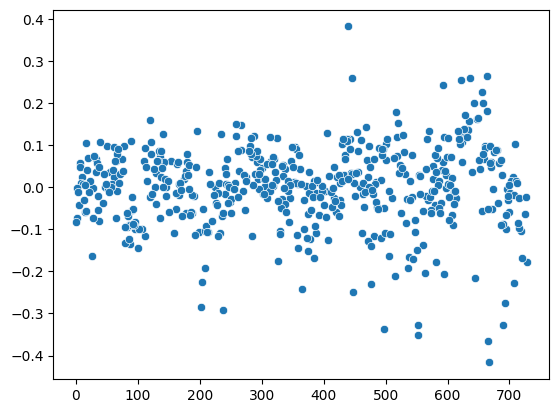

In [78]:
sns.scatterplot(res)

### Evaluating the model and predicting the values from test set

In [79]:
df_test.head()

mnth  holiday  weekday  workingday       temp     atemp      hum  \
184     7        1        1           0  29.793347  33.27085  63.7917   
535     6        0        3           1  32.082500  36.04875  59.2083   
299    10        0        4           1  19.270000  22.85230  81.2917   
221     8        0        3           1  31.433347  34.24915  42.4167   
152     6        0        4           1  29.315000  32.19710  30.5000   

     windspeed   cnt  year  date  weekend  spring  summer  winter  mild  \
184   5.459106  6043  2018     4        0       0       0       0     0   
535   7.625404  6211  2019    20        0       0       1       0     1   
299  13.250121  2659  2018    27        0       0       0       1     0   
221  13.417286  4780  2018    10        0       0       0       0     1   
152  19.583229  4968  2018     2        0       0       1       0     1   

     strong  
184       0  
535       0  
299       0  
221       0  
152       0

In [80]:
df_test.shape

(220, 17)

Performing the same scaling on df_test data set as done on training dataset

In [81]:
df_test[vars] = scaler.transform(df_test[vars])
df_test.head()

mnth  holiday   weekday  workingday       temp     atemp       hum  \
184  0.545455        1  0.166667           0  29.793347  0.769660  0.657364   
535  0.454545        0  0.500000           1  32.082500  0.842587  0.610133   
299  0.818182        0  0.666667           1  19.270000  0.496145  0.837699   
221  0.636364        0  0.500000           1  31.433347  0.795343  0.437098   
152  0.454545        0  0.666667           1  29.315000  0.741471  0.314298   

     windspeed       cnt  year      date  weekend  spring  summer  winter  \
184   0.084219  0.692706   0.0  0.100000        0       0       0       0   
535   0.153728  0.712034   1.0  0.633333        0       0       1       0   
299   0.334206  0.303382   0.0  0.866667        0       0       0       1   
221   0.339570  0.547400   0.0  0.300000        0       0       0       0   
152   0.537414  0.569029   0.0  0.033333        0       0       1       0   

     mild  strong  
184     0       0  
535     1       0  
299     0       0  
221     1       0  
152     1       0

Defining X_test and y_test

In [82]:
y_test = df_test.pop('cnt')
X_test = df_test

#### Make predictions on test dataset

In [83]:
X_test_new = sm.add_constant(X_test)
X_test_new = X_test_new[X_train_rfe5.columns] #creating new df by dropping variables from X_test. Variables removed from training set to be dropped from test set too
X_test_new.head()


const  holiday     atemp  windspeed  year  spring  mild  strong
184    1.0        1  0.769660   0.084219   0.0       0     0       0
535    1.0        0  0.842587   0.153728   1.0       0     1       0
299    1.0        0  0.496145   0.334206   0.0       0     0       0
221    1.0        0  0.795343   0.339570   0.0       0     1       0
152    1.0        0  0.741471   0.537414   0.0       0     1       0

In [84]:
# predict y values
y_pred = lrm5.predict(X_test_new)

#### Evaluate the model

0.7909889486925221

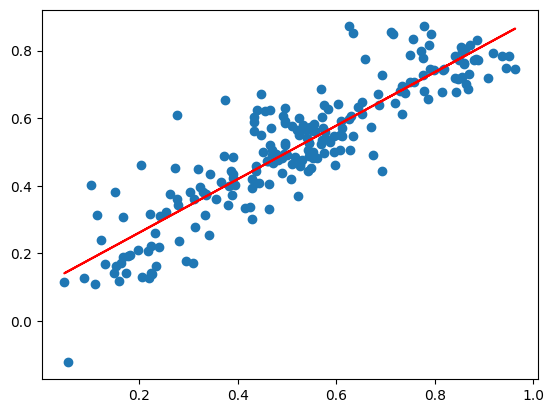

In [85]:
plt.scatter(y_test, y_pred)

corr = np.polyfit(y_test, y_pred, 1) 
plt.plot(y_test, corr[0]*y_test + corr[1], color='red') 
corr[0]

### Evaluating using the R2_score

In [86]:
from sklearn.metrics import r2_score


In [87]:
r2_score(y_true = y_test, y_pred = y_pred)

0.7967706756090944

### Conclusion:
### Model lrm5 is the chosen model with r2 score of  81%. A total of 7 different models were tried out, lrm to lrm6
### r2_Score on test data 79.7%is also coming the same range as aroung 81%
### The variables considered in the model are 
### - holiday: day of the week has a negative influence
### - atemp: real feel temperature also has a positive influence. This has the highest positive influence.
### - windspeed: negative influence. 
### - spring: spring weather has a negative influence
### - winter: winter has a positive influence
### - mild_weather: has positive influence(Clear, Few clouds, Partly cloudy, Partly cloudy)
### - strong_weather: has negative influence which is self explanatory(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
### - year: year has apositive influence meaning 'cnt' target variable increases by year. The year 2019 after the covid-lock down and restrictions is seeing a jump in the bike sharing service demand
